# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np
import nltk
import string

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [2]:
# Add any additional import statements you need here
from collections import Counter
import matplotlib.pyplot as plt


In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/evachow/Documents/USD/ADS509/Module2/M1_Results/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter"
lyrics_folder = "lyrics"

In [4]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens) # len gets the sum of values in a list
    # see https://www.geeksforgeeks.org/how-to-count-unique-values-inside-a-list/
    num_unique_tokens = len(set(tokens)) # sets don't contain duplicates, therefore we can sum a set to get unique values
    lexical_diversity = len(set(tokens))/len(tokens)
    # see https://stackoverflow.com/questions/25934586/finding-the-amount-of-characters-of-all-words-in-a-list-in-python
    num_characters = sum([len(i) for i in tokens])
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")

        # print the five most common tokens
        # see https://www.geeksforgeeks.org/find-k-frequent-words-data-set-python/
        print(Counter(tokens).most_common(5))
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

# lexical diversity is a measure of the number of unique words in a text
# lexical diversity = number of unique words/ total number of words   

In [5]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
[('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1)]


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertion statements help to ensure that code runs appropriately. In the case that there are bugs or errors in code, the error/warning that we instruct the assertion statement to deliver will tell us that something is amiss. We are ultimately testing the assumptions that we have made about the code and what it will return.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [6]:
# Read in the lyrics data
# define our unique artists
artist = ['cher', 'robyn']

# define the path (define the lyric folder then the folder for each artist)
path_lyrics = data_location + lyrics_folder

# see https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
path_lyrics_artist = [f for f in os.listdir(path_lyrics) if not f.startswith('.')]

# let's append artist, song, and lyrics of each song
singer = [] # defined as singer because will probably use artist for loops later
song = [] # DON'T FORGET THAT THIS (SINGULAR) IS A LIST
lyric = []

# first, a loop to go through each artist
for artist in path_lyrics_artist:
    unique_artist = path_lyrics + '/' + artist
    unique_song = os.listdir(unique_artist)
    
    # now a loop to go through each artist's song
    for music in unique_song:
        # hidden .DS_Store file needs to be hidden otherwise [Errno 20]
        path_songs = unique_artist + '/' + music
        # see https://www.adamsmith.haus/python/answers/how-to-read-a-text-file-into-a-list-in-python
        with open(path_songs) as the_path:
            the_songs = the_path.readlines()
            
        singer.append(artist)
        song.append(the_songs[0])
        lyric.append(''.join(the_songs[1:]))

In [7]:
# dataframe to check read in
headers = {'artist': singer,
          'song': song,
          'lyric': lyric}
lyric = pd.DataFrame(headers)
lyric.head(5)

,artist,song,lyric
0,robyn,"""Include Me Out""\n",\n\n\nIt is really very simple\nJust a single ...
1,robyn,"""Electric""\n",\n\n\nElectric...\n\nIt's electric\nIt's a nat...
2,robyn,"""Beach 2K20""\n",\n\n\n(So you wanna go out?\nHow you gonna get...
3,robyn,"""Love Kills""\n",\n\n\nIf you're looking for love\nGet a heart ...
4,robyn,"""Time Machine""\n","\n\n\nHey, what did I do?\nCan't believe the f..."


In [8]:
# checking if both artists were read
lyric.artist.unique()

array(['robyn', 'cher'], dtype=object)

In [9]:
# remove \n or tabs
lyric = lyric.replace(r'\n', ' ', regex=True)
lyric.head(5)

,artist,song,lyric
0,robyn,"""Include Me Out""",It is really very simple Just a single puls...
1,robyn,"""Electric""",Electric... It's electric It's a natural h...
2,robyn,"""Beach 2K20""",(So you wanna go out? How you gonna get the...
3,robyn,"""Love Kills""",If you're looking for love Get a heart made...
4,robyn,"""Time Machine""","Hey, what did I do? Can't believe the fit I..."


In [10]:
# Read in the twitter data
# we only need the descriptions, will use pandas
cher_twitter = pd.read_csv('/Users/evachow/Documents/USD/ADS509/Module2/M1_Results/twitter/cher_followers_data.txt', sep='\t+')

<ipython-input-10-527c880cbec0>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  cher_twitter = pd.read_csv('/Users/evachow/Documents/USD/ADS509/Module2/M1_Results/twitter/cher_followers_data.txt', sep='\t+')


In [11]:
cher_twitter.head(5)

,screen_name,name,id,location,followers_count,friends_count,description
0,hsmcnp,Country Girl,35152213,1302,1014,None,None
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
2,anju79990584,anju,1496463006451974150,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,None
3,gallionjenna,J,3366479914,752,556,csu,None
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...


In [12]:
# let's get only the descriptions
cher_twitter['artist'] = 'cher'
cher_twitter = cher_twitter[['artist', 'description']]
cher_twitter.head(5)

,artist,description
0,cher,None
1,cher,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
2,cher,None
3,cher,None
4,cher,Writer @Washinformer @SpelmanCollege alumna #D...


In [13]:
robyn_twitter = pd.read_csv('/Users/evachow/Documents/USD/ADS509/Module2/M1_Results/twitter/robynkonichiwa_followers_data.txt', sep='\t+')

<ipython-input-13-65da7644b2a4>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  robyn_twitter = pd.read_csv('/Users/evachow/Documents/USD/ADS509/Module2/M1_Results/twitter/robynkonichiwa_followers_data.txt', sep='\t+')


In [14]:
robyn_twitter.head(5)

,screen_name,name,id,location,followers_count,friends_count,description
0,AngelxoArts,Angelxo,1424055675030806529,"Zacatlan, Puebla, Mexico",29,535,"""I love chill"" •Facebook / Instagram / SoundCl..."
1,songsfornikola,johnny,1502717352575651840,6,318,"books, movies, music, nature & TV shows. OG Sw...",None
2,thibaud_lola,Thibaud Lola,1502407708246478852,3,69,(Am)auteur en herbe 🌱 - juriste en paille 🤡 - ...,None
3,KyleSew2112,Kyle S 🌹🇬🇧🇺🇦,3423966821,South East London,1258,3444,This Twitter profile is full of sarcasm and ra...
4,MusiFlo,MusiFlo,3324069364,Canada,470,1706,Flora Youssef - Blogger & Founder Posting revi...


In [15]:
robyn_twitter['artist'] = 'robyn'
robyn_twitter = robyn_twitter[['artist', 'description']]
robyn_twitter.head(5)

,artist,description
0,robyn,"""I love chill"" •Facebook / Instagram / SoundCl..."
1,robyn,None
2,robyn,None
3,robyn,This Twitter profile is full of sarcasm and ra...
4,robyn,Flora Youssef - Blogger & Founder Posting revi...


In [16]:
# using pandas, concatenate both twitter dataframes into one
dataframes = [cher_twitter, robyn_twitter]
twitter = pd.concat(dataframes)

In [17]:
twitter.head(5)

,artist,description
0,cher,None
1,cher,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
2,cher,None
3,cher,None
4,cher,Writer @Washinformer @SpelmanCollege alumna #D...


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [18]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [19]:
punctuation = set(punctuation) # speeds up comparison

In [20]:
# create your clean twitter data here

# remove punctuation

# let's define a function to remove punctuations
def no_punctuations(desc):
    for punctuation in string.punctuation:
        desc = desc.replace(punctuation, '')
    return desc

# convert descriptions to string
twitter['no_punc'] = twitter['description'].astype(str)
twitter['no_punc'] = twitter['no_punc'].apply(no_punctuations)

In [21]:
# split on whitespace
twitter['whitespace'] = twitter['no_punc'].str.replace('\n', ' ')

In [22]:
# fold to lowercase
# see https://www.programiz.com/python-programming/methods/string/casefold
twitter['lowercase'] = twitter['whitespace'].str.casefold()

In [23]:
# remove stopwords
# see https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe
stops = set(stopwords.words("english"))
twitter['use_words'] = twitter['lowercase'].apply(lambda x: ' '.join([word for word in x.split() if word not in stops]))

In [24]:
twitter.tail(10)

,artist,description,no_punc,whitespace,lowercase,use_words
358362,robyn,None,None,None,none,none
358363,robyn,None,None,None,none,none
358364,robyn,still not grown up....,still not grown up,still not grown up,still not grown up,still grown
358365,robyn,"person, she/her.",person sheher,person sheher,person sheher,person sheher
358366,robyn,To fear love is to fear life.,To fear love is to fear life,To fear love is to fear life,to fear love is to fear life,fear love fear life
358367,robyn,"singer of songs, type 1 diabetic, tired $jakel...",singer of songs type 1 diabetic tired jakelgil...,singer of songs type 1 diabetic tired jakelgil...,singer of songs type 1 diabetic tired jakelgil...,singer songs type 1 diabetic tired jakelgiles ...
358368,robyn,Dadx2/ Con-Arch/ Photographer/ DK #stemgrønnes...,Dadx2 ConArch Photographer DK stemgrønnest grø...,Dadx2 ConArch Photographer DK stemgrønnest grø...,dadx2 conarch photographer dk stemgrønnest grø...,dadx2 conarch photographer dk stemgrønnest grø...
358369,robyn,A year to change a life is still a year ✨😌,A year to change a life is still a year ✨😌,A year to change a life is still a year ✨😌,a year to change a life is still a year ✨😌,year change life still year ✨😌
358370,robyn,Head of Consumer - Mango. Made in Melbourne. R...,Head of Consumer Mango Made in Melbourne Ramb...,Head of Consumer Mango Made in Melbourne Ramb...,head of consumer mango made in melbourne ramb...,head consumer mango made melbourne ramblings
358371,robyn,"Stand for what is right, even if you stand alone.",Stand for what is right even if you stand alone,Stand for what is right even if you stand alone,stand for what is right even if you stand alone,stand right even stand alone


In [25]:
# create your clean lyrics data here

# we'll follow the same steps as above

# convert lyrics to string
lyric['no_punc'] = lyric['lyric'].astype(str)
lyric['no_punc'] = lyric['no_punc'].apply(no_punctuations)

In [26]:
# split on whitespace
lyric['whitespace'] = lyric['no_punc'].str.replace('\n', ' ')

In [27]:
# fold to lowercase
# see https://www.programiz.com/python-programming/methods/string/casefold
lyric['lowercase'] = lyric['whitespace'].str.casefold()

In [28]:
# remove stopwords
# see https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe
stops = set(stopwords.words("english"))
lyric['use_words'] = lyric['lowercase'].apply(lambda x: ' '.join([word for word in x.split() if word not in stops]))

In [29]:
lyric.tail(10)

,artist,song,lyric,no_punc,whitespace,lowercase,use_words
410,cher,"""I Walk Alone""",There's a poet in me that remembers And the...,Theres a poet in me that remembers And ther...,Theres a poet in me that remembers And ther...,theres a poet in me that remembers and ther...,theres poet remembers theres honesty every wor...
411,cher,"""Lie To Me""","Hmmm... Oh, fuck, just lie to me Tell me s...",Hmmm Oh fuck just lie to me Tell me someth...,Hmmm Oh fuck just lie to me Tell me someth...,hmmm oh fuck just lie to me tell me someth...,hmmm oh fuck lie tell something sweet till loo...
412,cher,"""Back On The Street Again""",I was so lonely until I met you Told myself...,I was so lonely until I met you Told myself...,I was so lonely until I met you Told myself...,i was so lonely until i met you told myself...,lonely met told id get without love drowning s...
413,cher,"""Love On A Rooftop""",We used to talk forever on a dime Now we li...,We used to talk forever on a dime Now we li...,We used to talk forever on a dime Now we li...,we used to talk forever on a dime now we li...,used talk forever dime live together never fin...
414,cher,"""Hard Enough Getting Over You""","For the first time, in such a long time I'v...",For the first time in such a long time Ive ...,For the first time in such a long time Ive ...,for the first time in such a long time ive ...,first time long time ive feeling theres reason...
415,cher,"""Take It From The Boys""",So scared I never been Too hard to keep it ...,So scared I never been Too hard to keep it ...,So scared I never been Too hard to keep it ...,so scared i never been too hard to keep it ...,scared never hard keep good girl independent c...
416,cher,"""Dream Baby""",I found the boy for me He's my dream baby ...,I found the boy for me Hes my dream baby H...,I found the boy for me Hes my dream baby H...,i found the boy for me hes my dream baby h...,found boy hes dream baby doesnt almost die wal...
417,cher,"""Please Don't Tell Me""",Ya shook the override Why'd I get this far...,Ya shook the override Whyd I get this far ...,Ya shook the override Whyd I get this far ...,ya shook the override whyd i get this far ...,ya shook override whyd get far time ton mean r...
418,cher,"""I Hope You Find It""","These clouds aren't going nowhere, darling ...",These clouds arent going nowhere darling Ra...,These clouds arent going nowhere darling Ra...,these clouds arent going nowhere darling ra...,clouds arent going nowhere darling rain keeps ...
419,cher,"""Classified 1A""",I know now how much I love you I knew it su...,I know now how much I love you I knew it su...,I know now how much I love you I knew it su...,i know now how much i love you i knew it su...,know much love knew surely saw blood cried wet...


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [30]:
# calls to descriptive_stats here

# cher
cher_desc = twitter[twitter['artist'] == 'cher'][['use_words']]
cher_text = re.sub('\s+\.','.', ' '.join(cher_desc['use_words']))
cher_list = cher_text.split()

cher_lyrics = lyric[lyric['artist'] == 'cher'][['use_words']]
cher_lyrics_text = re.sub('\s+\.','.', ' '.join(cher_lyrics['use_words']))
cher_lyrics_list = cher_lyrics_text.split()

# robyn
robyn_desc = twitter[twitter['artist'] == 'robyn'][['use_words']]
robyn_text = re.sub('\s+\.','.', ' '.join(robyn_desc['use_words']))
robyn_list = robyn_text.split()

robyn_lyrics = lyric[lyric['artist'] == 'robyn'][['use_words']]
robyn_lyrics_text = re.sub('\s+\.','.', ' '.join(robyn_lyrics['use_words']))
robyn_lyrics_list = robyn_lyrics_text.split()

In [31]:
# descriptive statistics calls

print('Descriptive statistics for Cher follower descriptions:')
descriptive_stats(cher_list, cher_text, verbose=True)

print ('\nDescriptive statistics for Cher lyrics:')
descriptive_stats(cher_lyrics_list, cher_lyrics_text, verbose=True)

print('\nDescriptive statistics for Robyn follower descriptions:')
descriptive_stats(robyn_list, robyn_text, verbose=True)

print ('\nDescriptive statistics for Robyn lyrics:')
descriptive_stats(robyn_lyrics_list, robyn_lyrics_text, verbose=True)

Descriptive statistics for Cher follower descriptions:
There are 14219405 tokens in the data.
There are 1198811 unique tokens in the data.
There are 80184848 characters in the data.
The lexical diversity is 0.084 in the data.
[('none', 2612958), ('love', 141632), ('im', 92060), ('life', 87862), ('music', 65892)]

Descriptive statistics for Cher lyrics:
There are 35233 tokens in the data.
There are 3684 unique tokens in the data.
There are 169244 characters in the data.
The lexical diversity is 0.105 in the data.
[('love', 966), ('im', 511), ('know', 480), ('dont', 430), ('youre', 332)]

Descriptive statistics for Robyn follower descriptions:
There are 1393896 tokens in the data.
There are 210455 unique tokens in the data.
There are 8141230 characters in the data.
The lexical diversity is 0.151 in the data.
[('none', 215682), ('music', 12487), ('love', 8503), ('im', 6749), ('life', 5806)]

Descriptive statistics for Robyn lyrics:
There are 15041 tokens in the data.
There are 2139 unique

[15041, 2139, 0.1422112891430091, 72804]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: If the stopwords were left in the data, the top five words may have changed completely. As seen from Module 1's assignment, all of the top 5 words were found to be one of these stopwords.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: Since these are two different artists, I would have thought that the lexical diversity between the two would be greater. However, as pop artists tend to have songs that are quite repetitive, it makes sense that both Cher and Robyn wouldn't show high lexical complexity. They even appear to have similar song "themes", with love and know appearing in both of their top 5 words.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [32]:
def is_emoji(s):
    # see slack. UNICODE_EMOJI is depracated -> return(s in emoji.UNICODE_EMOJI['en'])
    return(emoji.is_emoji(s))
assert(is_emoji("❤️"))
assert(not is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [33]:
# cher followers
cher_emojis = []

for i in cher_list:
    if is_emoji(i):
        cher_emojis.append(i)
        
print('The top 10 emojis most commonly used by Cher fans in their Twitter descriptions are:')
print(Counter(cher_emojis).most_common(10))

The top 10 emojis most commonly used by Cher fans in their Twitter descriptions are:
[('🏳️\u200d🌈', 11481), ('❤️', 10430), ('♥', 6720), ('❤', 6369), ('✨', 6054), ('🌈', 4365), ('🇺🇸', 3003), ('💙', 2805), ('💜', 2592), ('🌊', 2537)]


In [34]:
# robyn followers
robyn_emojis = []

for i in robyn_list:
    if is_emoji(i):
        robyn_emojis.append(i)
        
print('The top 10 emojis most commonly used by Robyn fans in their Twitter descriptions are:')
print(Counter(robyn_emojis).most_common(10))

The top 10 emojis most commonly used by Robyn fans in their Twitter descriptions are:
[('🏳️\u200d🌈', 1542), ('♥', 801), ('❤️', 736), ('✨', 622), ('🌈', 495), ('❤', 425), ('🎶', 233), ('🎧', 196), ('🖤', 185), ('💜', 153)]


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [35]:
# redefine because we removed punctuations

# cher
cher_desc = twitter[twitter['artist'] == 'cher'][['description']].astype(str)
cher_desc_text = re.sub('\s+\.','.', ' '.join(cher_desc['description']))
cher_desc_list = cher_desc_text.split()

# robyn
robyn_desc = twitter[twitter['artist'] == 'robyn'][['description']].astype(str)
robyn_desc_text = re.sub('\s+\.','.', ' '.join(robyn_desc['description']))
robyn_desc_list = robyn_desc_text.split()

In [36]:
# cher followers
cher_hashtags = []

for i in cher_desc_list:
    if re.findall(r"#(\w+)", i):
        cher_hashtags.append(i)

print('The top 10 hashtags most commonly used by Cher fans in their Twitter descriptions are:')
print(Counter(cher_hashtags).most_common(10))

The top 10 hashtags most commonly used by Cher fans in their Twitter descriptions are:
[('#BLM', 6461), ('#Resist', 3938), ('#BlackLivesMatter', 3434), ('#resist', 2457), ('#FBR', 2212), ('#TheResistance', 1948), ('#blacklivesmatter', 1902), ('#1', 1663), ('#Resistance', 1211), ('#RESIST', 1159)]


In [37]:
# robyn followers
robyn_hashtags = []

for i in robyn_desc_list:
    if re.findall(r"#(\w+)", i):
        robyn_hashtags.append(i)

print('The top 10 hashtags most commonly used by Robyn fans in their Twitter descriptions are:')
print(Counter(robyn_hashtags).most_common(10))

The top 10 hashtags most commonly used by Robyn fans in their Twitter descriptions are:
[('#BlackLivesMatter', 277), ('#BLM', 238), ('#blacklivesmatter', 169), ('#1', 151), ('#music', 131), ('#Music', 83), ('#EDM', 71), ('#blm', 43), ('#LGBTQ', 42), ('#TeamFollowBack', 42)]


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [38]:
# cher
cher_lyrics = lyric[lyric['artist'] == 'cher'][['song']]
cher_lyrics_text = re.sub('\s+\.','.', ' '.join(cher_lyrics['song']))
cher_lyrics_list = cher_lyrics_text.split()

# robyn
robyn_lyrics = lyric[lyric['artist'] == 'robyn'][['song']]
robyn_lyrics_text = re.sub('\s+\.','.', ' '.join(robyn_lyrics['song']))
robyn_lyrics_list = robyn_lyrics_text.split()

In [39]:
print('The top 5 common words in Cher song titles are:')
print(Counter(cher_lyrics_list).most_common(5))

The top 5 common words in Cher song titles are:
[('The', 29), ('To', 28), ('"The', 24), ('Of', 21), ('"I', 21)]


In [40]:
print('The top 5 common words in Robyn song titles are:')
print(Counter(robyn_lyrics_list).most_common(5))

The top 5 common words in Robyn song titles are:
[('Me', 7), ('You', 7), ('The', 7), ('My', 6), ('To', 6)]


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


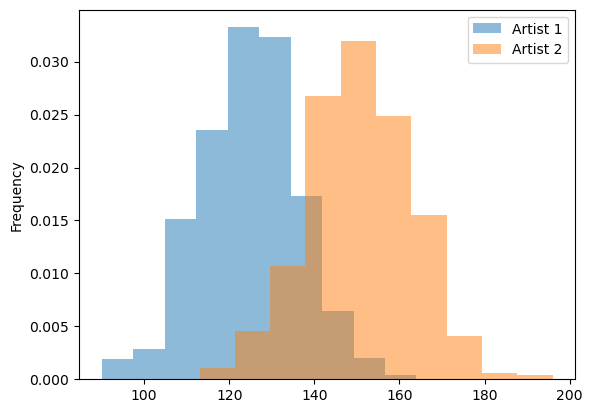

In [41]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)
plt.show()

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: It matches on one or more white spaces.


In [42]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [43]:
lyric['song_length'] = lyric['use_words'].str.split(' ').str.len()
lyric.head(5)

,artist,song,lyric,no_punc,whitespace,lowercase,use_words,song_length
0,robyn,"""Include Me Out""",It is really very simple Just a single puls...,It is really very simple Just a single puls...,It is really very simple Just a single puls...,it is really very simple just a single puls...,really simple single pulse repeated regular in...,233
1,robyn,"""Electric""",Electric... It's electric It's a natural h...,Electric Its electric Its a natural high E...,Electric Its electric Its a natural high E...,electric its electric its a natural high e...,electric electric natural high electric dont a...,152
2,robyn,"""Beach 2K20""",(So you wanna go out? How you gonna get the...,So you wanna go out How you gonna get there...,So you wanna go out How you gonna get there...,so you wanna go out how you gonna get there...,wanna go gonna get ok call someone alright ok ...,172
3,robyn,"""Love Kills""",If you're looking for love Get a heart made...,If youre looking for love Get a heart made ...,If youre looking for love Get a heart made ...,if youre looking for love get a heart made ...,youre looking love get heart made steel cus kn...,244
4,robyn,"""Time Machine""","Hey, what did I do? Can't believe the fit I...",Hey what did I do Cant believe the fit I ju...,Hey what did I do Cant believe the fit I ju...,hey what did i do cant believe the fit i ju...,hey cant believe fit threw stupid wanted react...,127


In [44]:
lyric.artist.unique()

array(['robyn', 'cher'], dtype=object)

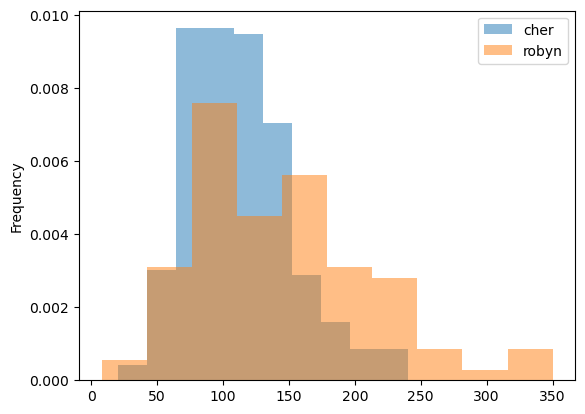

In [45]:
# your lyric length comparison chart here
lyric.groupby('artist')['song_length'].plot(kind="hist",density=True,alpha=0.5,legend=True)
plt.show()